# Análisis exploratorio de datos

## Problem Statement

This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?

### Columns Name
- employee_id
- department
- region
- education
- gender
- recruitment_channel
- nooftrainings
- age previousyearrating
- lengthofservice
- KPIs_met >80%
- awards_won?
- avgtrainingscore
- is_promoted

In [4]:
#importar las librerías necesarias para trabajar con un dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train data

In [80]:
#Dataset de entrenamiento

#imortamos el data set
dataset_train = pd.read_csv('train.csv', delimiter = ',')
dataset_train.head()

#analizamos el dataset
dataset_train.info()
dataset_train.head()
dataset_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


(54808, 14)

In [63]:
#comprobamos si tiene valores nulos
dataset_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [64]:
#comprobamos los valores de las columnas de tipo objeto para ver si tienen valores validos
for column in dataset_train.columns:
    if dataset_train[column].dtype == 'object':
        print(column, ": ", dataset_train[column].unique())

department :  ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region :  ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education :  ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender :  ['f' 'm']
recruitment_channel :  ['sourcing' 'other' 'referred']


In [65]:
#como es un dataset bastante extenso, la eliminación de los datos nulos no repercutirá de manera significante en el resultado
dataset_train.dropna(inplace=True)

In [66]:
#comprobamos que se han eliminado correctamente
dataset_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [67]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [68]:
#check duplicates en employee_id 
dataset_train['employee_id'].duplicated().sum()

0

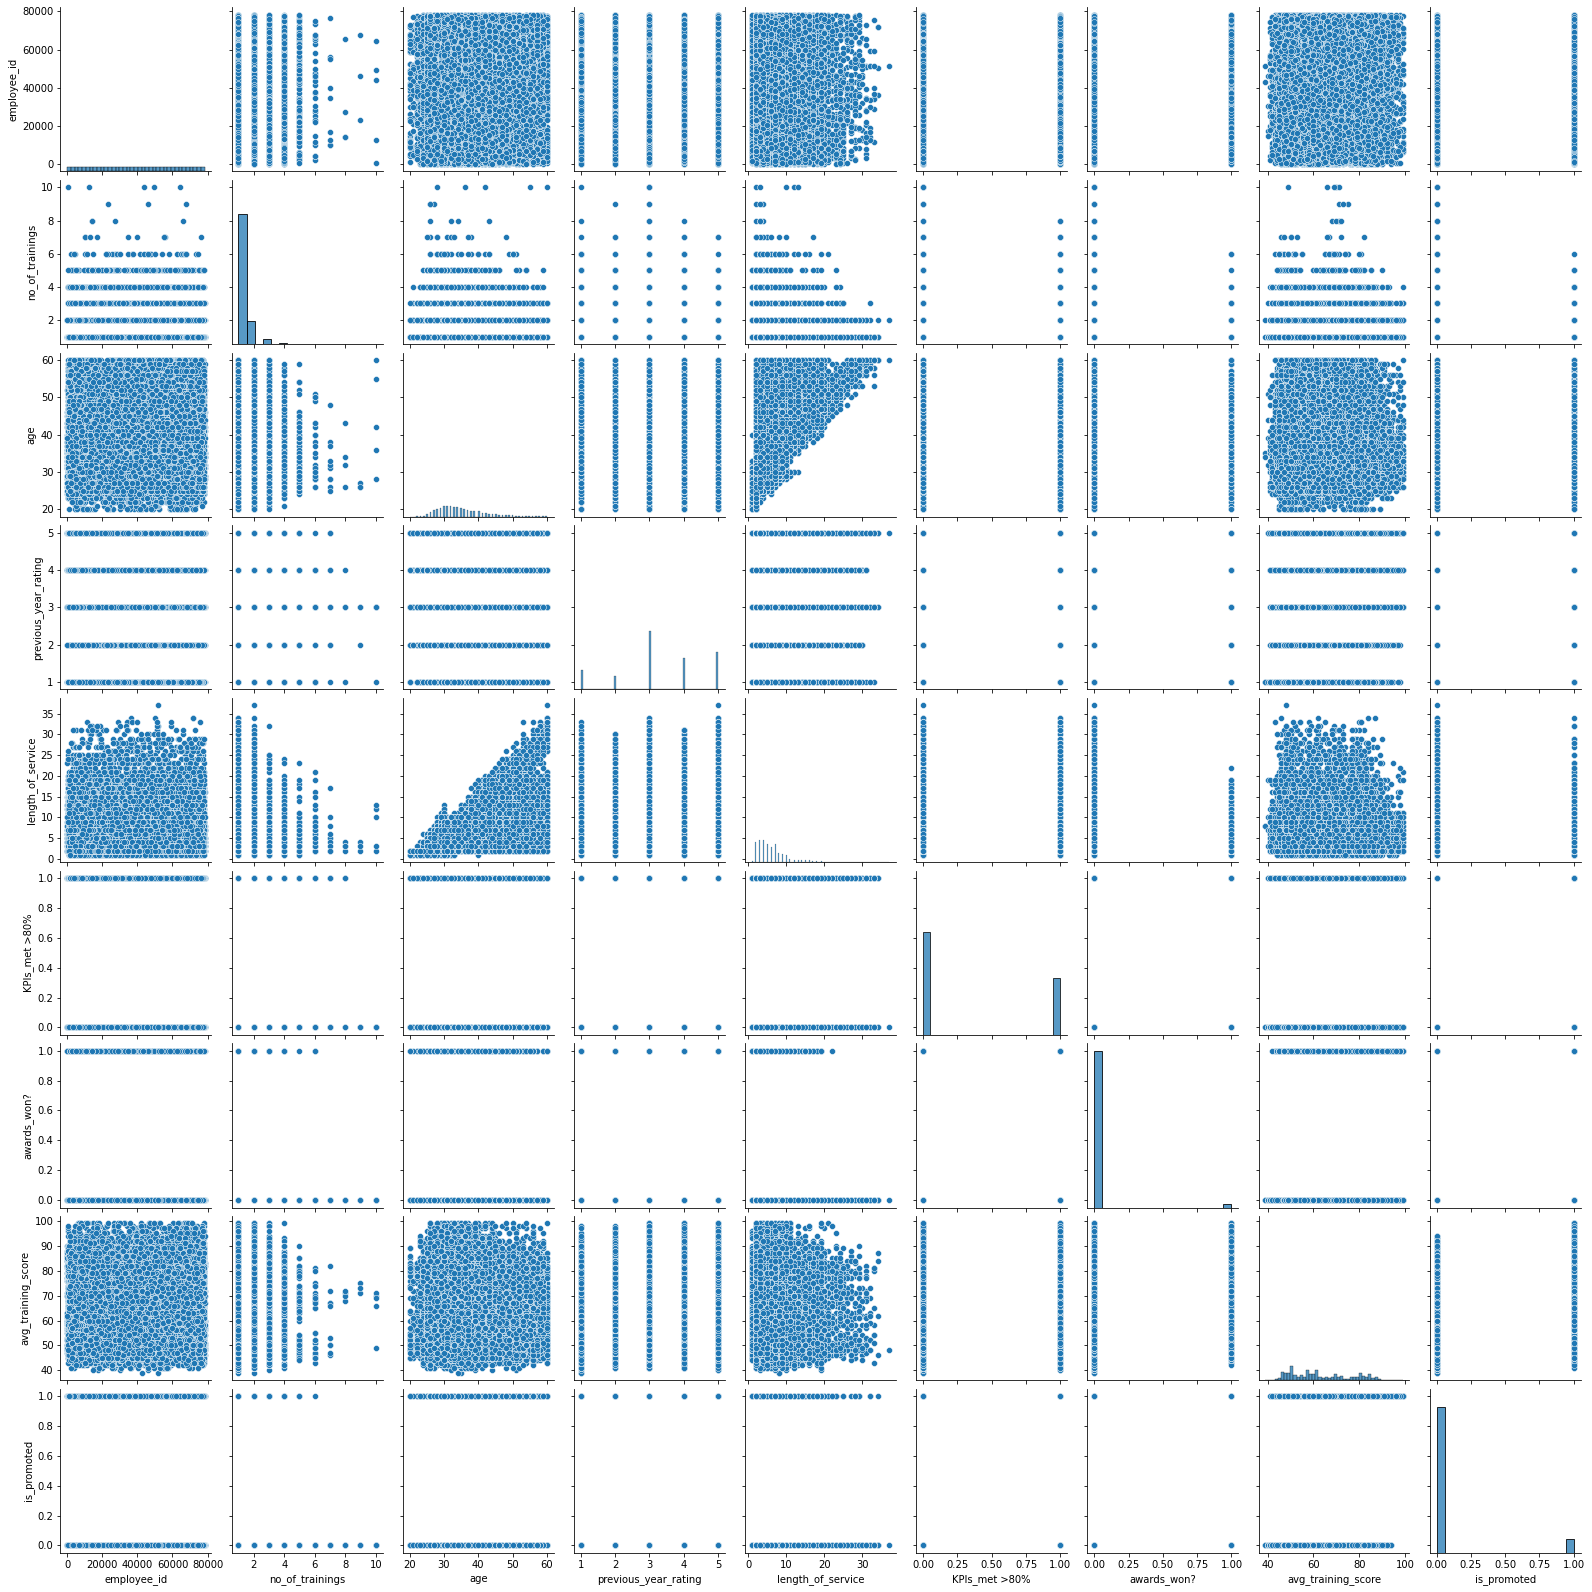

In [12]:
sns.pairplot(dataset_train)
plt.show()

<AxesSubplot:>

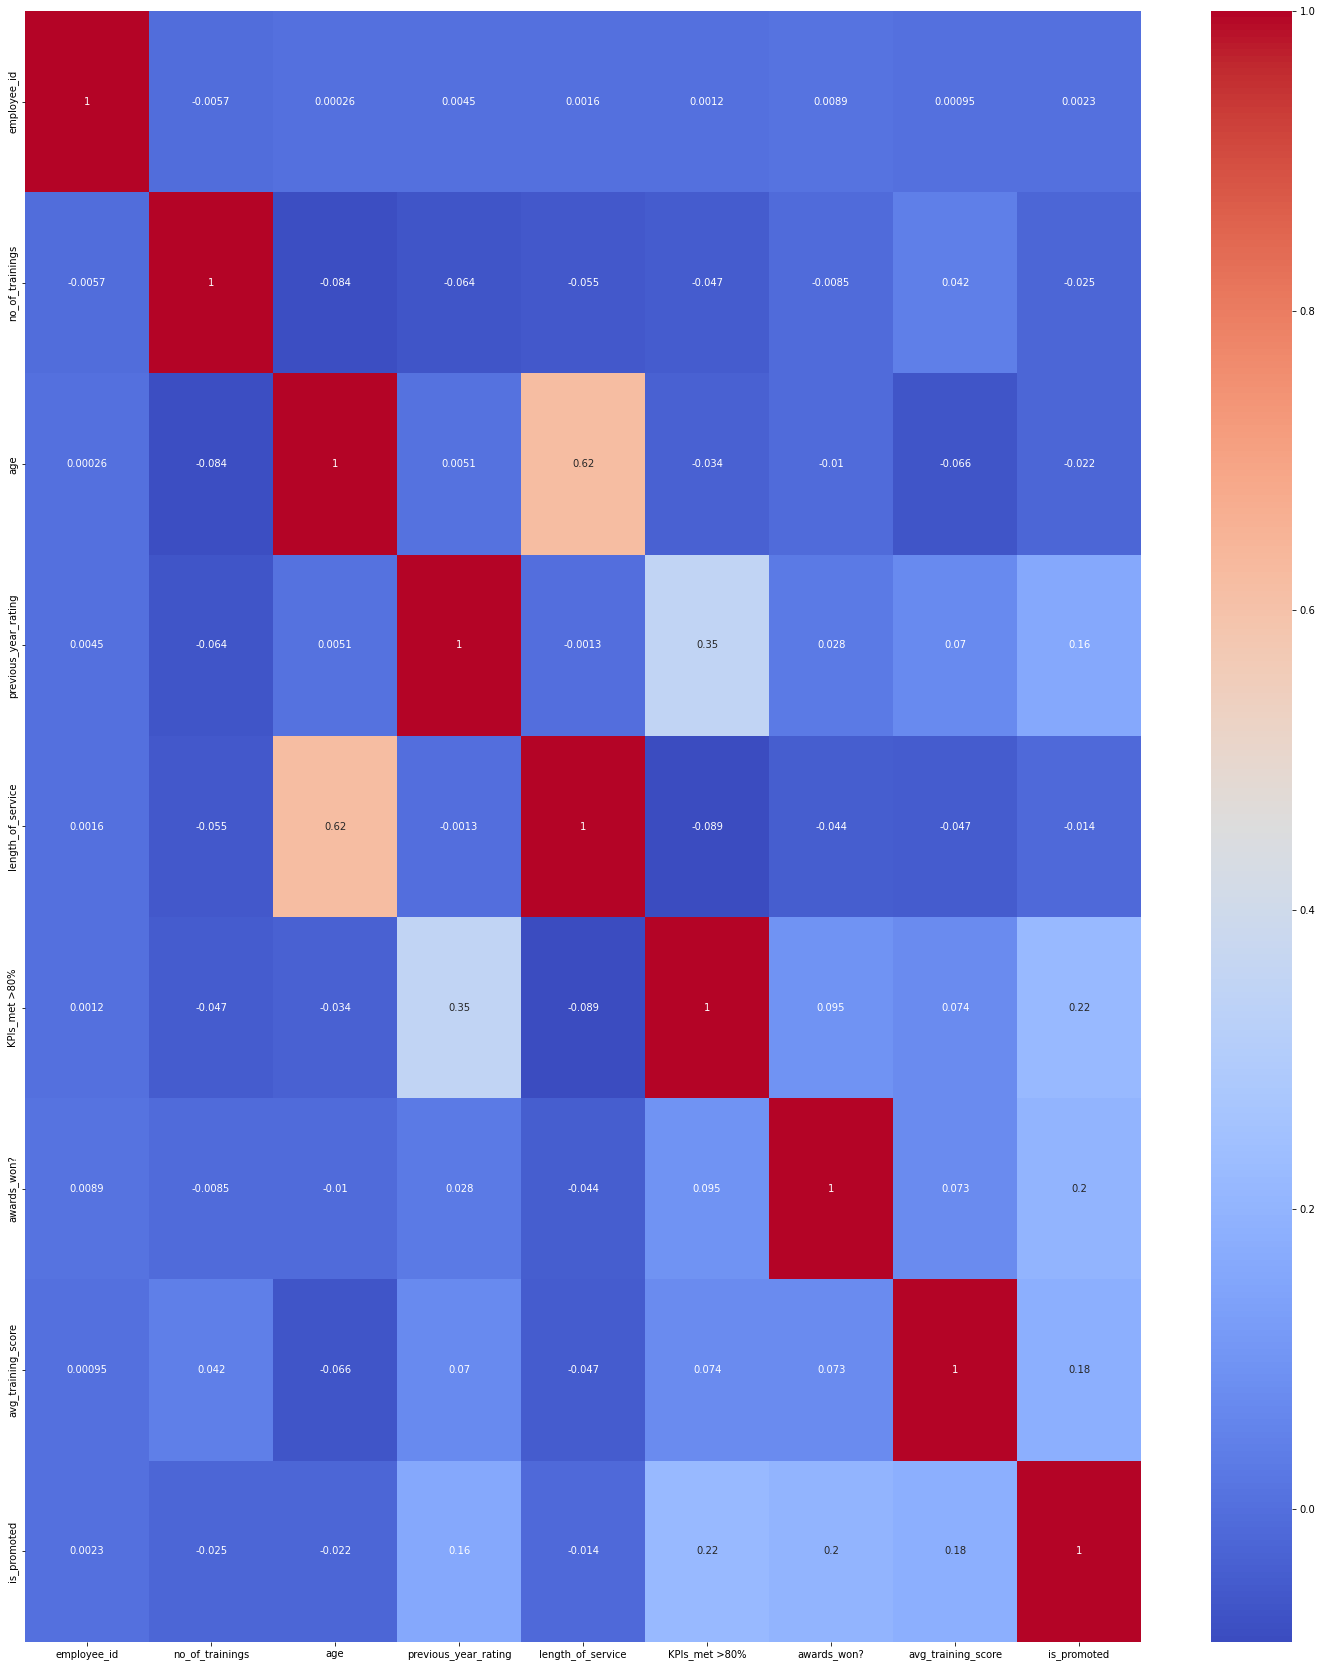

In [13]:
#correlation between feaures
plt.figure(figsize=(25,30))
sns.heatmap(dataset_train.corr(),annot=True, cmap='coolwarm')

In [14]:
##Pearsons's correlation coefficients shows us is there linear correlation between variables or not. 
#And the assumption about age and length_of_service correlation is confirmed
#sBy the way, all other features are not correlated and that is good

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

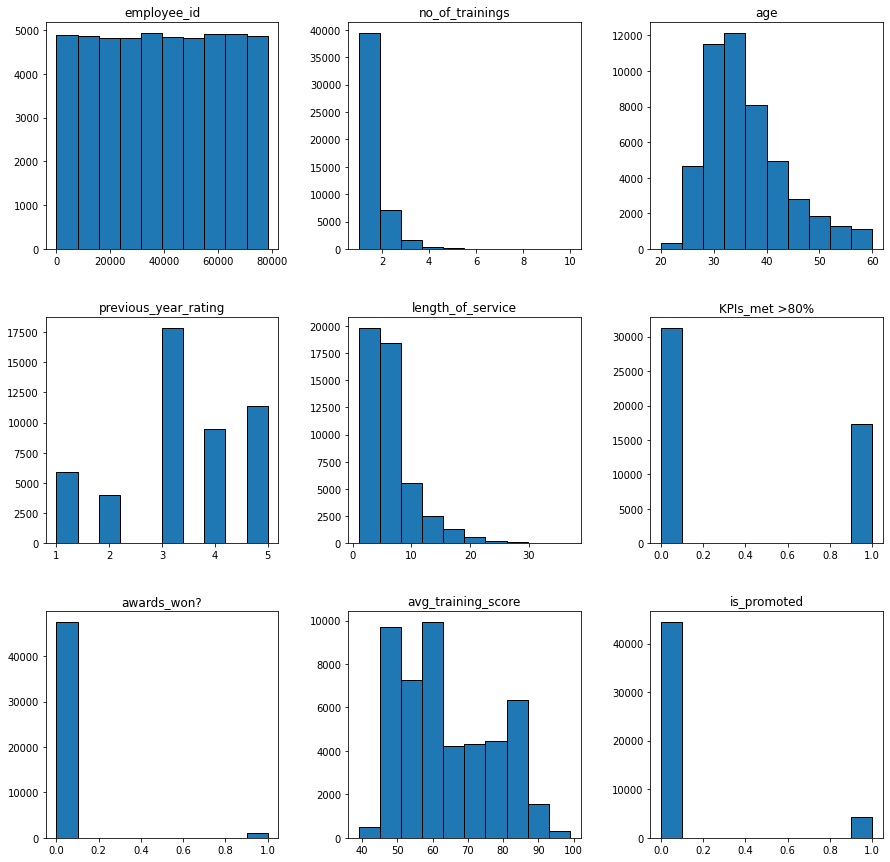

In [15]:
#variables continuas

dataset_train.hist(edgecolor='black',linewidth=1,figsize=(15,15), grid=False)

<AxesSubplot:>

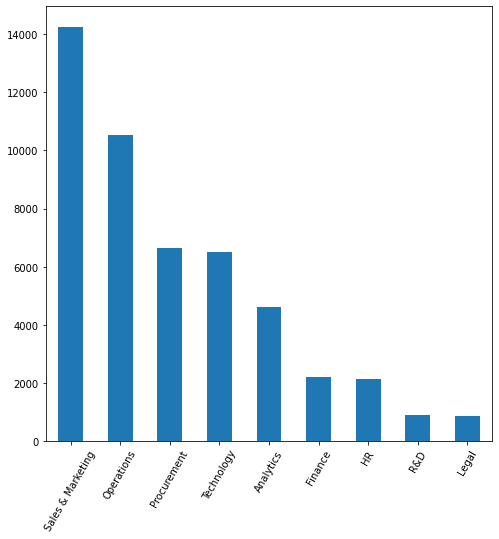

In [16]:
#variables categoricas:
## department
dataset_train['department'].value_counts().plot.bar(rot=60,figsize=(8,8))


<AxesSubplot:>

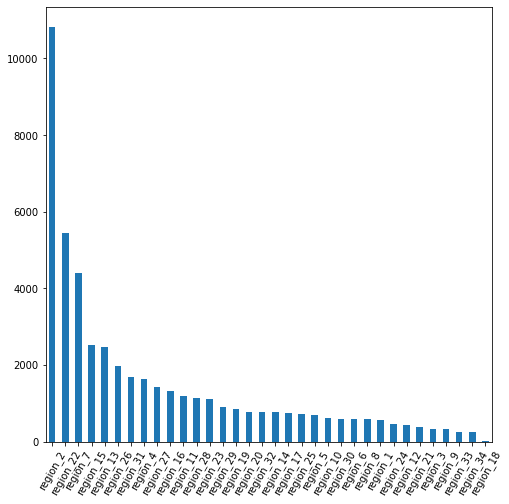

In [17]:
#variables categoricas:
## region
dataset_train['region'].value_counts().plot.bar(rot=60,figsize=(8,8))

<AxesSubplot:>

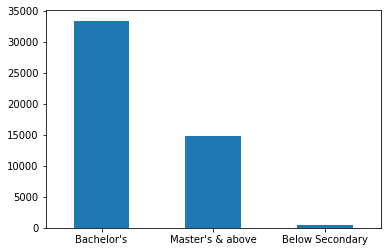

In [18]:
#variables categoricas:
## education
dataset_train['education'].value_counts().plot.bar(rot=0)

<AxesSubplot:ylabel='gender'>

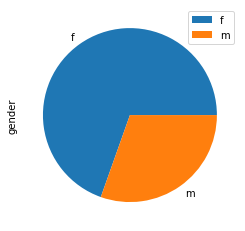

In [19]:
#variables categoricas:
## gender

dataset_train['gender'].value_counts().plot(kind="pie", labels=dataset_train['gender'], legend=True)


C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

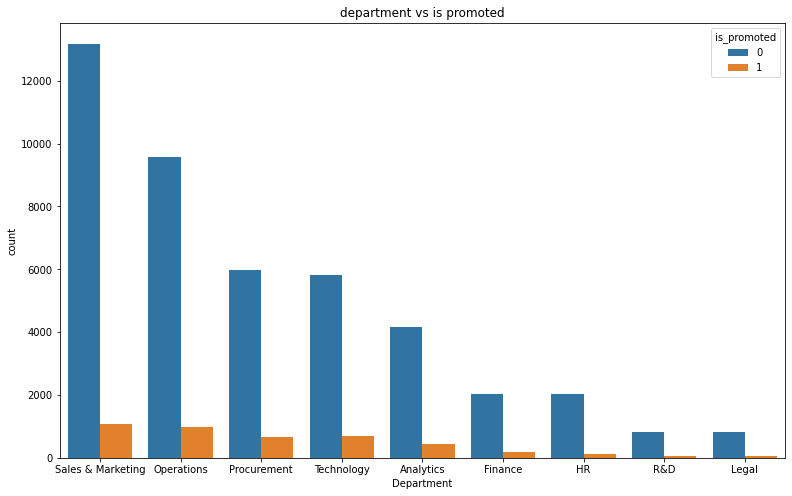

In [20]:
## cada vable contra la vble objetivo:
# employee_id             0 - no
# department              0
plt.subplots(figsize=(13,8))
sns.countplot(dataset_train['department'],hue=dataset_train['is_promoted'], order = dataset_train['department'].value_counts().index)
plt.title('department vs is promoted')
plt.xlabel('Department')
plt.ylabel('count')

## de acuerdo con el gráfico, los que tienen mas posibilidades de ser ascendidos son los que pertenecen al departamento de Sales&Marketing

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

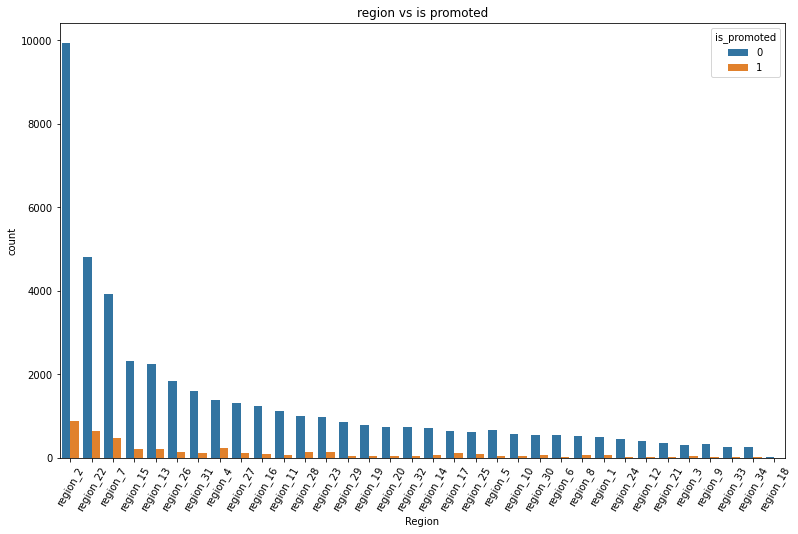

In [21]:
# region                  
plt.subplots(figsize=(13,8))
sns.countplot(dataset_train['region'],hue=dataset_train['is_promoted'], order = dataset_train['region'].value_counts().index)
plt.title('region vs is promoted')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.ylabel('count')


C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

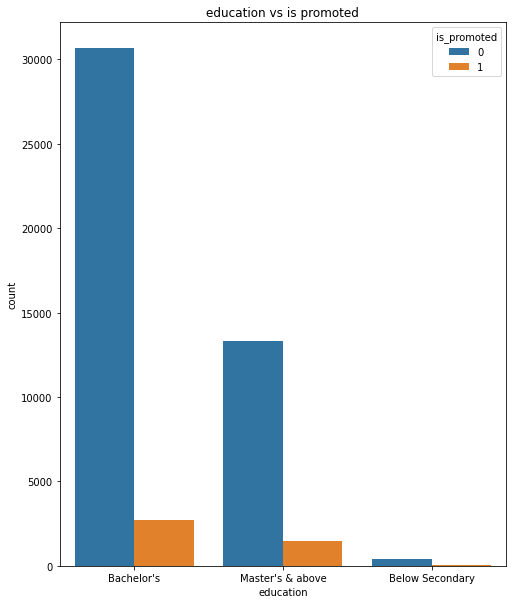

In [22]:
# education               
plt.subplots(figsize=(8,10))
sns.countplot(dataset_train['education'],hue=dataset_train['is_promoted'], order = dataset_train['education'].value_counts().index)
plt.title('education vs is promoted')
plt.xlabel('education')
plt.ylabel('count')


C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

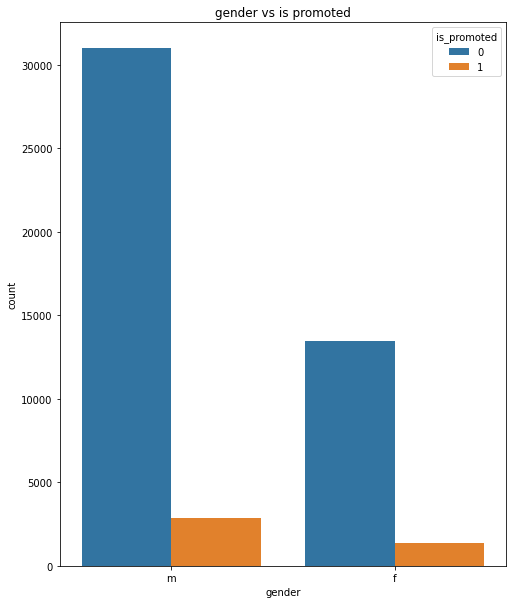

In [23]:
# gender                  
plt.subplots(figsize=(8,10))
sns.countplot(dataset_train['gender'],hue=dataset_train['is_promoted'], order = dataset_train['gender'].value_counts().index)
plt.title('gender vs is promoted')
plt.xlabel('gender')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

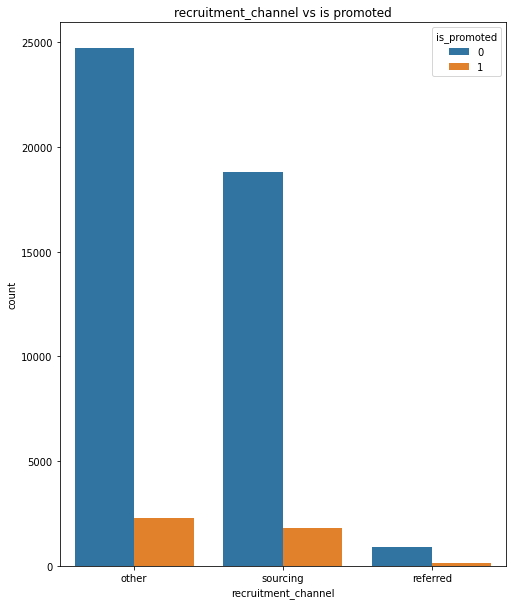

In [24]:
# recruitment_channel     0
plt.subplots(figsize=(8,10))
sns.countplot(dataset_train['recruitment_channel'],hue=dataset_train['is_promoted'], order = dataset_train['recruitment_channel'].value_counts().index)
plt.title('recruitment_channel vs is promoted')
plt.xlabel('recruitment_channel')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

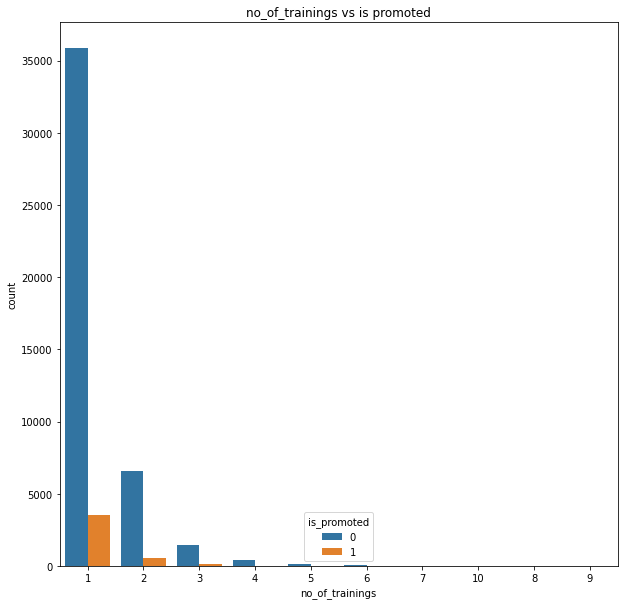

In [25]:
# no_of_trainings         0
plt.subplots(figsize=(10,10))
sns.countplot(dataset_train['no_of_trainings'],hue=dataset_train['is_promoted'], order = dataset_train['no_of_trainings'].value_counts().index)
plt.title('no_of_trainings vs is promoted')
plt.xlabel('no_of_trainings')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

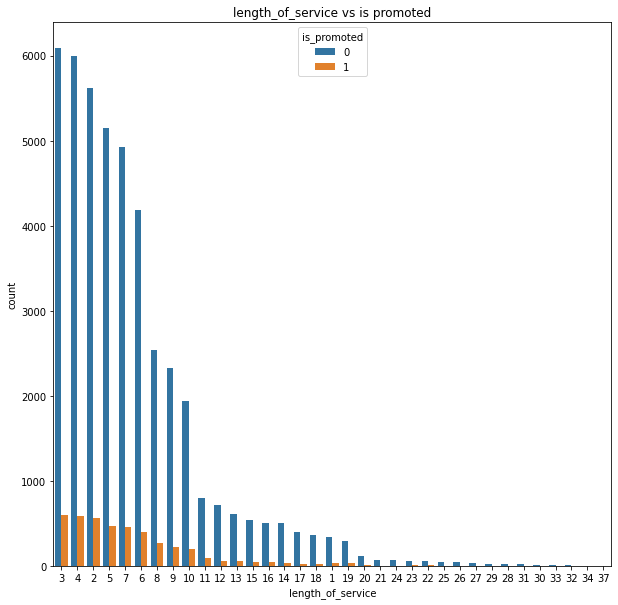

In [26]:
# length_of_service       0
plt.subplots(figsize=(10,10))
sns.countplot(dataset_train['length_of_service'],hue=dataset_train['is_promoted'] ,order = dataset_train['length_of_service'].value_counts().index)
plt.title('length_of_service vs is promoted')
plt.xlabel('length_of_service')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

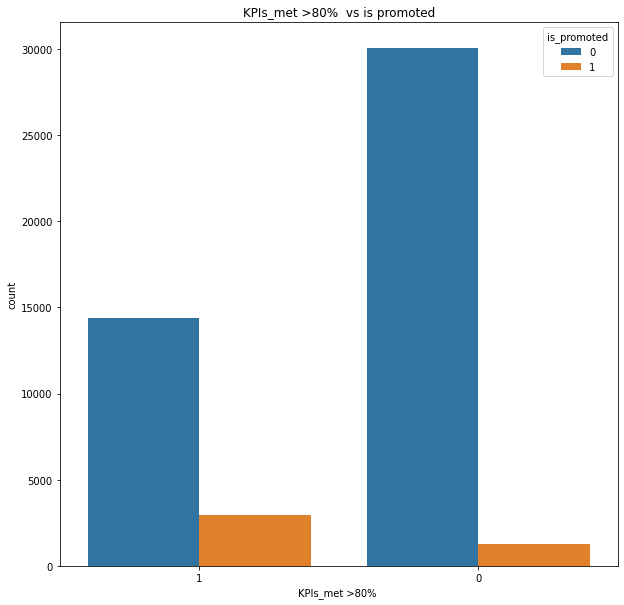

In [27]:
# KPIs_met >80%           0
plt.subplots(figsize=(10,10))
sns.countplot(dataset_train['KPIs_met >80%'],hue=dataset_train['is_promoted'], order = dataset_train['KPIs_met >80%'].value_counts().sort_values().index)
plt.title('KPIs_met >80%  vs is promoted')
plt.xlabel('KPIs_met >80% ')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

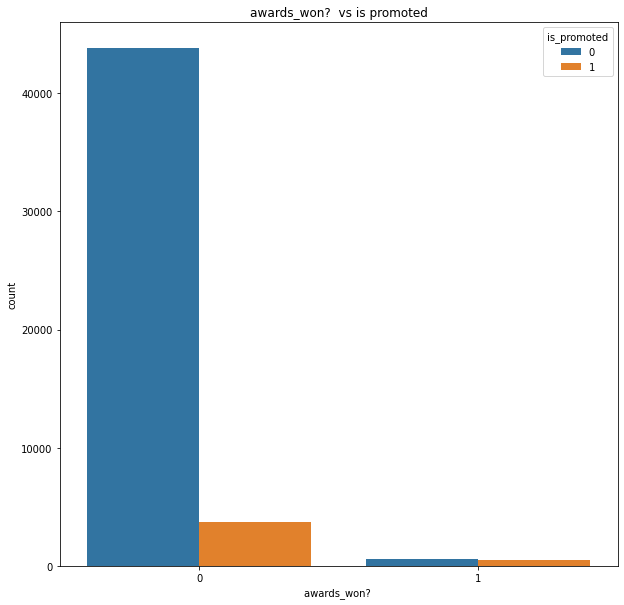

In [28]:
# awards_won? 
plt.subplots(figsize=(10,10))
sns.countplot(dataset_train['awards_won?'],hue=dataset_train['is_promoted'], order = dataset_train['awards_won?'].value_counts().index)
plt.title('awards_won?  vs is promoted')
plt.xlabel('awards_won? ')
plt.ylabel('count')

C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

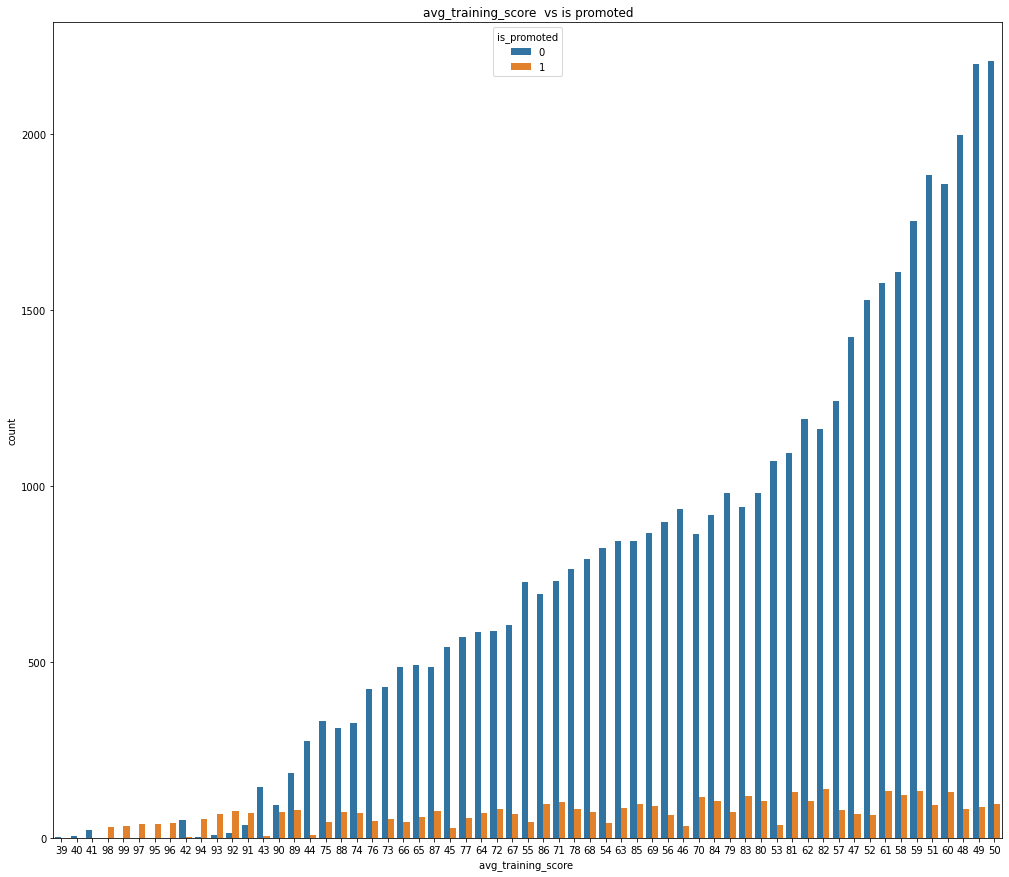

In [29]:
# avg_training_score      0

plt.subplots(figsize=(17,15))
sns.countplot(dataset_train['avg_training_score'], hue=dataset_train['is_promoted'], order = dataset_train['avg_training_score'].value_counts().sort_values().index)
plt.title('avg_training_score  vs is promoted')
plt.xlabel('avg_training_score ')
plt.ylabel('count')

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
44428
4232


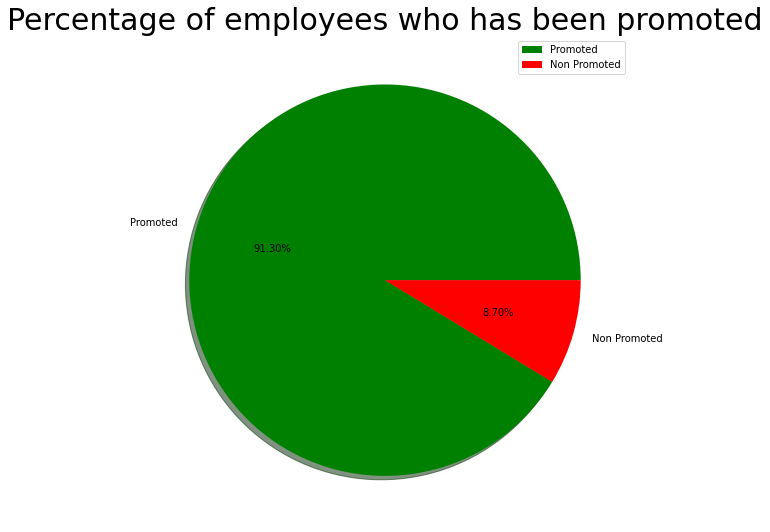

In [30]:
#dataset_train['is_promoted']['0'].size
promoted=[]
non_promoted=[]

for i in dataset_train['is_promoted']:
    if i==0:
        promoted.append(i)
    else:
        non_promoted.append(i)

promoted_arr=np.array(promoted)
non_promoted_arr=np.array(non_promoted)

print(promoted_arr)
print(non_promoted_arr)

size_prmoted=promoted_arr.size
print(size_prmoted)

size_non_promoted=non_promoted_arr.size
print(size_non_promoted)


size = (size_prmoted,size_non_promoted)
colors = ['green', 'red']
labels = "Promoted", "Non Promoted"

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Percentage of employees who has been promoted', fontsize = 30)

plt.legend()
plt.show()


# TEST DATA

In [31]:
##### cleaning test data ####
#imortamos el data set
dataset_test = pd.read_csv('test.csv', delimiter = ',')
dataset_test.head()
dataset_test.info()
dataset_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


(23490, 13)

In [32]:
dataset_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [33]:
#como es un dataset bastante extenso, la eliminación de los datos nulos no repercutirá de manera significante en el resultado
dataset_test.dropna(inplace=True)
#comprobamos que se han eliminado correctamente
print(dataset_test.isnull().sum())
print(dataset_test.shape)

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64
(20819, 13)


## REGRESION

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [69]:
#dropping employee_id column because it does not give us any useful info
dataset_train = dataset_train.drop('employee_id', axis=1)


In [74]:
x_train = dataset_train.drop('is_promoted', axis=1)
y_train = dataset_train['is_promoted']
x_train.head()



,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [79]:
x_test = dataset_test
x_test.head()
emp_id_test = dataset_test['employee_id']
dataset_test = dataset_test.drop('employee_id', axis=1)
dataset_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [36]:
# create dummy variables from train dataset
x_train_transformed = pd.get_dummies(x_train)
x_train_transformed.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [41]:
# create dummy variables from train dataset
x_test_transformed = pd.get_dummies(x_train)
x_test_transformed.columns


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [43]:
#we need to create dummy variables with the categorical ones
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train.values.ravel())
y_train_pred = classifier.predict(x_train_transformed)
y_test_pred = classifier.predict(x_test_transformed)

In [44]:
#y_train_a = np.array(y_train)
#y_train_pred_a = np.array(y_train_pred)

results =  pd.DataFrame(data=[y_train, y_train_pred]).T

print(y_train.shape, y_train_pred.shape, results.shape)
results

(48660,) (48660,) (48660, 2)


,is_promoted,Unnamed 0
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
54802,0.0,NaN
54803,0.0,NaN
54804,0.0,NaN
54805,0.0,NaN


In [45]:
df = pd.DataFrame({'y_train': y_train, 'y_pred': y_train_pred, 'status': y_train == y_train_pred})
df
#check the trues and false vales: i.e the good predections and the bad ones
df['status'].value_counts()

True     44428
False     4232
Name: status, dtype: int64

In [48]:
#Analizamos los resultados obtenidos
#matriz de confusion
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print ('La matriz de confusion para entrenamiento es: ')
print (confusion_matrix_train)

#la matriz de confusion muetra que la prediccion es:---
#para comparar resultados y verificar si existe o no sobreajuste, se normalizan las matrices:
confusion_matrix_train_normalizada = confusion_matrix_train/(confusion_matrix_train.astype(np.float).sum(axis=1))
print ('La matriz de confusion para entrenamiento NORMALIZADA es: ')
print (confusion_matrix_train_normalizada)


La matriz de confusion para entrenamiento es: 
[[44428     0]
 [ 4232     0]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[1.         0.        ]
 [0.09525524 0.        ]]


C:\Users\alici\AppData\Local\Temp\ipykernel_16656\3975892869.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  confusion_matrix_train_normalizada = confusion_matrix_train/(confusion_matrix_train.astype(np.float).sum(axis=1))


In [ ]:
#check sobreajuste: again

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuray_score_train = accuracy_score(y_train, y_train_pred)
precision_score_train = precision_score(y_train, y_train_pred)
recall_score_train = recall_score(y_train, y_train_pred)
print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train)
print('Precision: ', precision_score_train)
print('Recall: ', recall_score_train)

Resultados conjunto de entrenamiento: 
Accuracy:  0.9130291820797369
Precision:  0.0
Recall:  0.0


C:\Users\alici\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#Roc and AUC ---DATOS TEST
from sklearn.metrics import roc_curve, auc
false_positive_rate, recall, thresholds = roc_curve(y_test_pred, y_test_pred)
roc_auc = auc(false_positive_rate, recall)
print("AUC: ", roc_auc)

AUC:  nan


C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [ ]:
dataset_test.shape

(20819, 13)

DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier (max_depth=4,criterion='entropy', random_state=1)
dt_classifier.fit(x_train_transformed,y_train)
y_train_pred_dt = dt_classifier.predict(x_train_transformed)

accuray_score_train_dt = accuracy_score(y_train, y_train_pred_dt)
precision_score_train_dt = precision_score(y_train, y_train_pred_dt)
recall_score_train_dt = recall_score(y_train, y_train_pred_dt)
print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train_dt)
print('Precision: ', precision_score_train_dt)
print('Recall: ', recall_score_train_dt)

Resultados conjunto de entrenamiento: 
Accuracy:  0.9249897246198109
Precision:  0.9739413680781759
Recall:  0.14130434782608695


RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier (criterion='entropy', n_estimators = 10, max_depth=4, random_state=1)
rf_classifier.fit(x_train_transformed,y_train)
y_train_pred_rf = rf_classifier.predict(x_train_transformed)

accuray_score_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_score_train_rf = precision_score(y_train, y_train_pred_rf)
recall_score_train_rf = recall_score(y_train, y_train_pred_rf)
print ("Resultados conjunto de entrenamiento: ")
print('Accuracy: ', accuray_score_train_rf)
print('Precision: ', precision_score_train_rf)
print('Recall: ', recall_score_train_rf)

Resultados conjunto de entrenamiento: 
Accuracy:  0.9899712289354706
Precision:  0.9992
Recall:  0.8853969754253308
